# Debat Capres Periode 2 Word Cloud

**Disclaimer**

*Saya tidak terafiliasi pada salah satu calon presiden maupun partai politik manapun. Data-data yang diumumkan bersifat netral, tidak memihak, dan tidak terintervensi demi tegaknya kebenaran dan hasanah keilmuan. Saya tidak memiliki tanggung jawab atas segala bentuk penggunaan, pemanfaatan, penafsiran, penyiaran, dan segala bentuk hal terkait beserta konsekuensi pemakaian data yang dirilis.*

### Import Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

from PIL import Image
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

### Download Data dari BahasaKita.co.id

Data transkrip debat capres periode ke-2 saya peroleh dari situs http://debatcapres.bahasakita.co.id/. Resume debat capres ini disokong oleh **Notula Engine**, sebuah sistem untuk mentranskrip ucapan menjadi tulisan otomatis, live dan real time yang di khususkan untuk kegiatan rapat atau diskusi dengan adanya speech id untuk identifikasi suara berbasis deep learning.

In [2]:
transkrip_debat_json = requests.get('https://s3-ap-southeast-1.amazonaws.com/debatcapres/release/debat-capres-2h.json').json()
transkrip_debat = pd.DataFrame.from_dict(transkrip_debat_json['transkrip'])

In [3]:
transkrip_debat.head()

id    speaker                                               teks   time
0   1    panelis  para calon Presiden akan saling bertanya menja...  20:01
1   2    panelis             satu dan calon Presiden nomor urut 02.  20:02
2   3  pembicara  menyanyikan lagu kebangsaan Indonesia Raya. ha...  20:02
3   4  pembicara                              [Lagu Indonesia Raya]  20:03
4   5  pembicara  kita sambut moderator kita malam Tommy Tjokro ...  20:05

### Stop Words
Data stop words untuk Bahasa Indonesia saya peroleh dari repository https://github.com/stopwords-iso/stopwords-id/.

In [4]:
stop_words_url = [
    'https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/raw/bbalet_stopwords_id.txt',
    'https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/raw/gh-stopwords-json-id.txt',
    'https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/raw/indonesian-stopwords-complete.txt',
    'https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/raw/ranksnl-indonesian.txt'
]

In [5]:
stop_words = []

for url in stop_words_url:
    stop_words += requests.get(url).text.strip().split()

stop_words = list(set(stop_words))
stop_words[0:10]

['kasus',
 'diberikannya',
 'umum',
 'kamilah',
 'waktu',
 'menanti',
 'mula',
 'begitulah',
 'sekali',
 'yang']

### Data Cleansing

In [6]:
transkrip_debat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
id         329 non-null int64
speaker    329 non-null object
teks       329 non-null object
time       329 non-null object
dtypes: int64(1), object(3)
memory usage: 10.4+ KB


dari informasi tersebut dapat dilihat bahwa tidak terdapat kolom dengan data yang kosong. Selanjutnya dilakukan pemeriksaan atas nama-nama pembicara dalam debat.

In [7]:
transkrip_debat.speaker.unique()

array(['panelis', 'pembicara', 'Tommy Tjokro', 'Anisha Dasuki',
       'Prabowo Subianto', 'Joko Widodo', 'Prabowo Subianto ',
       'Anisha Dasuki ', 'Tommy Tjokro '], dtype=object)

Terdapat beberapa nama sama yang teridentifikasi berbeda karena spasi/whitespace pada bagian akhir

In [8]:
transkrip_debat['speaker'] = transkrip_debat.speaker.str.strip()

In [9]:
transkrip_debat.speaker.unique()

array(['panelis', 'pembicara', 'Tommy Tjokro', 'Anisha Dasuki',
       'Prabowo Subianto', 'Joko Widodo'], dtype=object)

### Stemming
Stemming merupakan proses mengembalikan kata berimbuhan menjadi kata dasar. Disini saya menggunakan package [Sastrawi](https://github.com/sastrawi/sastrawi).

In [10]:
jokowi = ' '.join([i for i in transkrip_debat[(transkrip_debat.speaker == 'Joko Widodo')].teks.tolist()])
prabowo = ' '.join([i for i in transkrip_debat[(transkrip_debat.speaker == 'Prabowo Subianto')].teks.tolist()])

In [11]:
stemmer = StemmerFactory().create_stemmer()

In [12]:
jokowi = stemmer.stem(jokowi)
prabowo = stemmer.stem(prabowo)

### Generate Word Cloud

Selanjutnya untuk membuat word cloud dari transkrip debat, saya menggunakan gambar siluet dari masing-masing calon presiden sebagai *mask*-nya.

In [13]:
jokowi_mask = np.array(Image.open('img/jokowi.jpg'))
prabowo_mask = np.array(Image.open('img/prabowo.jpg'))

In [14]:
wc = WordCloud(background_color='rgb(139,0,0)', random_state=42, stopwords=stop_words+['ya'], max_words=2000, 
               color_func=lambda *args, **kwargs: 'rgb(255, 255, 255)')

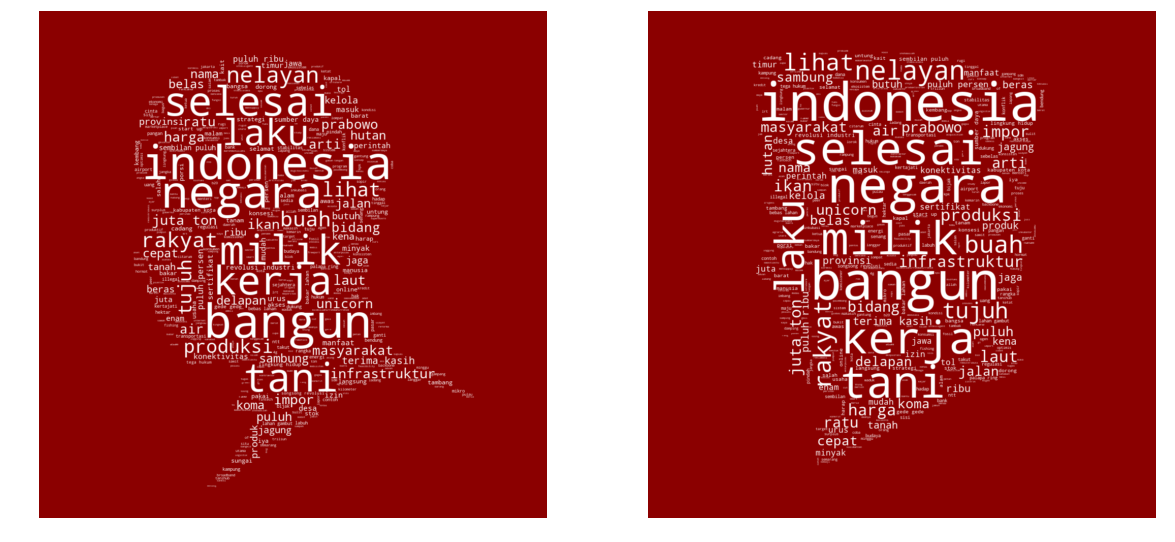

In [15]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,40)

index = 0

for mask, text in [[jokowi_mask, jokowi], [prabowo_mask, prabowo]]: 
    wc.mask = mask
    wc.generate(jokowi)
    wc.to_file('results/{}.png'.format(index+1))
    axes[index].imshow(wc, interpolation='bilinear')
    index += 1

for ax in axes:
    ax.set_axis_off()

plt.show()

### Sumber

- BahasaKita. (2019). *Resume Debat Capres*. [online] http://debatcapres.bahasakita.co.id. Available at: http://debatcapres.bahasakita.co.id/ [Accessed 25 Feb. 2019]
- Hagiaco. (2018). *#siluet #silhouette #jokowidodo #jokowi #irsoekarno #soekarno #bali #baliart*. [Image] Available at: https://www.instagram.com/p/Bjg9XXvjEvB/ [Accessed 25 Feb. 2019]
- *Siluet Prabowo*. [Image] Available at: https://pbs.twimg.com/media/DpLknIsUcAA6UBd.jpg [Accessed 25 Feb. 2019]